In [65]:
%run -i code_time_measurement.ipynb

In [66]:
tic()

In [67]:
# %run -i zero_reset_stored_variables.ipynb

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Stored 'arch_capacity_geometry_variables' (dict)
Stored 'pier_capacity_geometry_variables' (dict)
pier
{'b_pier': 1, 't_pier': 1.8, 'e_pier': 0}
1
[[0.7200000000000001, 0.7200000000000001, 0.7200000000000001, 0.7200000000000001, 0.6617142857142858, 0.5725714285714285, 0.4834285714285714, 0.3942857142857141, 0.3051428571428569, 0.21599999999999975]]
[[0.0, 0.2888888888888889, 0.5777777777777778, 0.8666666666666667, 1.1555555555555557, 1.4444444444444446, 1.7333333333333334, 2.0222222222222226, 2.3111111111111113, 2.6]]
Stored 'condition_factor' (list)
Stored 'pier_local_scour_depth' (list)


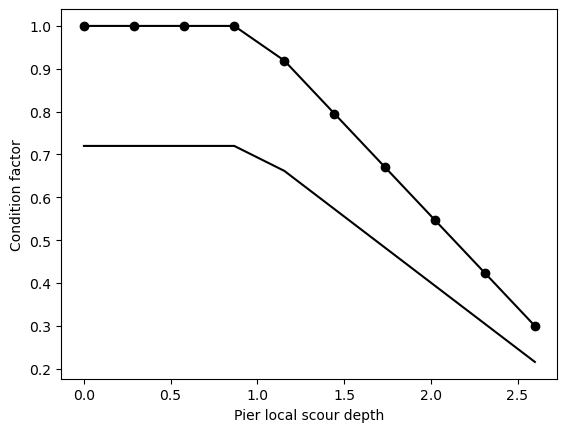

Stored variables and their in-db values:
arch_capacity_geometry_variables                   -> {'b': 1, 't': 0.5, 'e': 0.08333333333333333}
arch_compressive_demand_horizontal                 -> array([354.03374496, 334.49348592, 357.16702591, .
arch_compressive_demand_thrust                     -> array([525.16363953, 492.96620384, 530.32649903, .
arch_compressive_demand_vertical                   -> array([384.84532383, 359.54270092, 388.90259995, .
arch_compressive_failure_points_number             -> [69, 69, 69, 69, 259, 1880, 15286, 74760, 99995, 1
compressive_demand_from_arch                       -> {'H_a': array([40.52707914, 33.18183373, 41.704889
compressive_demand_from_backfill                   -> {'H_a': array([246.2211967, 246.2211967, 246.22119
compressive_demand_from_parapet                    -> {'H_a': array([11.18458987,  9.15746235, 11.509639
compressive_demand_from_spandrel_walls             -> {'H_a': array([56.10087926, 45.93299314, 57.731300
compressive_resistan

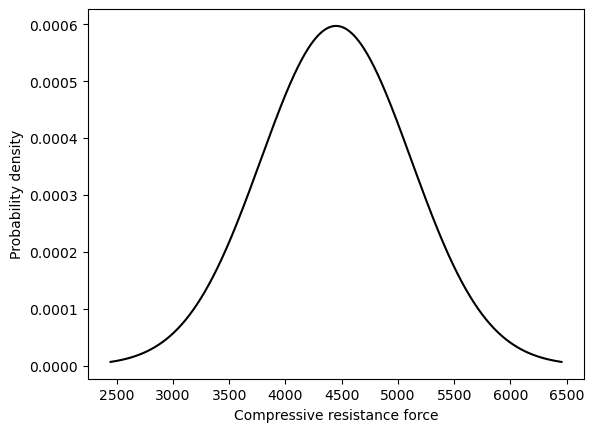

In [69]:
%run -i sixteen_pier_capacity.ipynb

In [70]:
%run -i seventeen_pier_compression_demand_from_pier.ipynb

Stored 'pier_compressive_demand_from_pier' (ndarray)


In [71]:
%run -i eighteen_pier_compressive_total_demand.ipynb

Stored 'pier_compressive_total_vertical_demand' (ndarray)


In [72]:
%store -r convergence_simulation_number
%store -r df_pier_compressive_capacity
%store -r pier_compressive_total_vertical_demand

In [73]:
%store -r pier_local_scour_depth

In [74]:
print(pier_compressive_total_vertical_demand)

[867.09544547 798.8362715  878.04080548 ... 865.58274093 854.05424697
 916.42402892]


In [75]:
# #Variables declared for code developing purposes
# example_number = 2
# pier_compressive_capacity = np.zeros((example_number, convergence_simulation_number)) #https://numpy.org/doc/stable/reference/generated/numpy.zeros.html
# pier_compressive_demand_thrust = np.random.normal(200, 100, convergence_simulation_number)

In [76]:
#five_pier_capacity gives a dataframe as capacity output
pier_compressive_capacity = df_pier_compressive_capacity.iloc[:,2:] #https://towardsdatascience.com/extract-rows-columns-from-a-dataframe-in-python-r-678e5b6743d6
print(type(pier_compressive_capacity))

<class 'pandas.core.frame.DataFrame'>


In [77]:
pier_compressive_capacity_array = np.array(pier_compressive_capacity)
print(pier_compressive_capacity_array.shape)
print(pier_compressive_capacity_array[:5,:])

(10, 100000)
[[4725.81624081 3430.42795909 4933.53177957 ... 4697.10889463
  4478.32693308 5661.94929421]
 [4725.81624081 3430.42795909 4933.53177957 ... 4697.10889463
  4478.32693308 5661.94929421]
 [4725.81624081 3430.42795909 4933.53177957 ... 4697.10889463
  4478.32693308 5661.94929421]
 [4725.81624081 3430.42795909 4933.53177957 ... 4697.10889463
  4478.32693308 5661.94929421]
 [4343.25016417 3152.72664812 4534.15063551 ... 4316.86674602
  4115.79570516 5203.60101801]]


In [78]:
print(pier_compressive_total_vertical_demand.shape)
pier_compressive_demand_thrust_expanded = np.expand_dims(pier_compressive_total_vertical_demand, 1)
print(pier_compressive_demand_thrust_expanded.shape)
print(pier_compressive_demand_thrust_expanded[0:10])

(100000,)
(100000, 1)
[[867.09544547]
 [798.8362715 ]
 [878.04080548]
 [867.03006605]
 [865.5711533 ]
 [856.45948664]
 [841.67854753]
 [884.88339292]
 [853.15202734]
 [849.4373655 ]]


In [79]:
pier_compressive_capacity_array_transposed = pier_compressive_capacity_array.T
print(pier_compressive_capacity_array_transposed.shape)

(100000, 10)


In [80]:
pier_compressive_limit_state_equation = []

In [81]:
for i in range(pier_compressive_capacity_array.shape[0]):
    compressive_limit_state_equation = pier_compressive_capacity_array_transposed[:,[i]] - pier_compressive_demand_thrust_expanded
    pier_compressive_limit_state_equation.append(compressive_limit_state_equation)

print(len(pier_compressive_limit_state_equation))
print(pier_compressive_limit_state_equation[0:5])

10
[array([[3858.72079534],
       [2631.5916876 ],
       [4055.49097409],
       ...,
       [3831.5261537 ],
       [3624.2726861 ],
       [4745.52526529]]), array([[3858.72079534],
       [2631.5916876 ],
       [4055.49097409],
       ...,
       [3831.5261537 ],
       [3624.2726861 ],
       [4745.52526529]]), array([[3858.72079534],
       [2631.5916876 ],
       [4055.49097409],
       ...,
       [3831.5261537 ],
       [3624.2726861 ],
       [4745.52526529]]), array([[3858.72079534],
       [2631.5916876 ],
       [4055.49097409],
       ...,
       [3831.5261537 ],
       [3624.2726861 ],
       [4745.52526529]]), array([[3476.1547187 ],
       [2353.89037662],
       [3656.10983003],
       ...,
       [3451.28400509],
       [3261.74145819],
       [4287.17698909]])]


In [82]:
pier_compressive_limit_state_equation_array = np.array(pier_compressive_limit_state_equation)
print(pier_compressive_limit_state_equation_array)

[[[3858.72079534]
  [2631.5916876 ]
  [4055.49097409]
  ...
  [3831.5261537 ]
  [3624.2726861 ]
  [4745.52526529]]

 [[3858.72079534]
  [2631.5916876 ]
  [4055.49097409]
  ...
  [3831.5261537 ]
  [3624.2726861 ]
  [4745.52526529]]

 [[3858.72079534]
  [2631.5916876 ]
  [4055.49097409]
  ...
  [3831.5261537 ]
  [3624.2726861 ]
  [4745.52526529]]

 ...

 [[1720.85154354]
  [1079.73142039]
  [1823.65516905]
  ...
  [1706.64355851]
  [1598.36288305]
  [2184.16725124]]

 [[1135.75048516]
  [ 655.01176831]
  [1212.83694872]
  ...
  [1125.09674299]
  [1043.903358  ]
  [1483.16400529]]

 [[ 550.64942677]
  [ 230.29211623]
  [ 602.01872839]
  ...
  [ 543.54992746]
  [ 489.44383295]
  [ 782.16075934]]]


In [83]:
pier_compressive_limit_state_equation_array.shape

(10, 100000, 1)

In [84]:
print(pier_compressive_limit_state_equation_array.shape[0])
print(pier_compressive_limit_state_equation_array.shape[1])

10
100000


In [85]:
pier_compressive_limit_state_equation_array_reshaped = pier_compressive_limit_state_equation_array.reshape(pier_compressive_limit_state_equation_array.shape[0], pier_compressive_limit_state_equation_array.shape[1])

In [86]:
pier_compressive_failure_points = pier_compressive_limit_state_equation_array_reshaped<=0
print(pier_compressive_failure_points)
print(pier_compressive_failure_points.shape)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
(10, 100000)


In [87]:
pier_compressive_failure_points_number = []

In [88]:
for i in range(pier_compressive_limit_state_equation_array.shape[0]):
    compressive_failure_points_number = np.count_nonzero(pier_compressive_failure_points[i, :])
    pier_compressive_failure_points_number.append(compressive_failure_points_number)

In [89]:
pier_compressive_failure_points_number

[0, 0, 0, 0, 0, 0, 0, 0, 0, 52]

In [90]:
pier_compressive_failure_probability_data = []

In [91]:
for i in range(len(pier_compressive_failure_points_number)):
    failure_probability_data = pier_compressive_failure_points_number[i]/convergence_simulation_number
    pier_compressive_failure_probability_data.append(failure_probability_data)

In [92]:
# https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples
xs = []
ys = []

In [93]:
for i in range(len(pier_compressive_failure_probability_data)):
    rounded_xs = round(pier_local_scour_depth[0][i], 2)
    rounded_ys = round(pier_compressive_failure_probability_data[i], 4) #https://stackoverflow.com/questions/3400965/getting-only-1-decimal-place
    xs.append(rounded_xs)
    ys.append(rounded_ys)

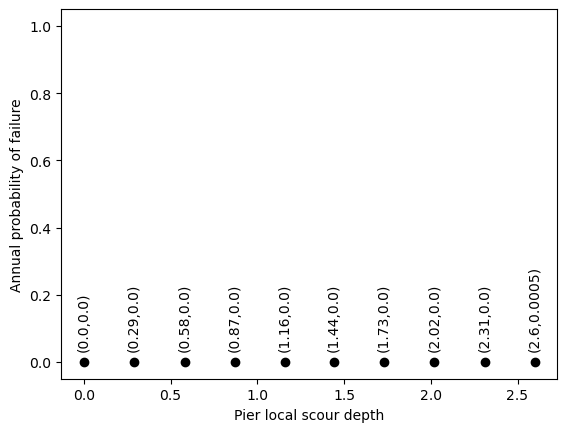

In [94]:
plt.scatter(xs, ys, color = 'black')
plt.ylim([-0.05, 1.05])
plt.xlabel('Pier local scour depth')
plt.ylabel('Annual probability of failure')

for x,y in zip(xs, ys): #https://realpython.com/python-zip-function/#using-zip-in-python
    label = f"({x},{y})"
    plt.annotate(label,
                (x,y),
                textcoords="offset points",
                xytext=(0,10),
                ha='center',
                rotation=90)

In [95]:
%store pier_compressive_failure_points_number

Stored 'pier_compressive_failure_points_number' (list)


In [104]:
#https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/
pier_compressive_failure_probability_data = {'pier_local_scour_depth': pier_local_scour_depth[0],
                                                'number_of_analyses': convergence_simulation_number,
                                                'number_of_collapses': pier_compressive_failure_points_number}

In [105]:
df_pier_compressive_failure_probability_data = pd.DataFrame(pier_compressive_failure_probability_data)

In [106]:
df_pier_compressive_failure_probability_data

,pier_local_scour_depth,number_of_analyses,number_of_collapses
0,0.000000,100000,0
1,0.288889,100000,0
2,0.577778,100000,0
3,0.866667,100000,0
4,1.155556,100000,0
5,1.444444,100000,0
6,1.733333,100000,0
7,2.022222,100000,0
8,2.311111,100000,0
9,2.600000,100000,52


In [109]:
df_pier_compressive_failure_probability_data.to_excel("twenty_pier_compressive_failure_probability_data.xlsx")

In [96]:
toc()

Elapsed time: 104.765398 seconds.

Elapsed time: 1.746090 minutes.

Elapsed time: 0.029101 hours.

